In [10]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 

In [11]:
class RidgeRegression():
    def __init__(self, learning_rate, iterations, l2_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penalty = l2_penalty # L2 regulization term,  lambda*sum(individual weight/slope coefficients)
        
    # function for model training
    def fit(self, X,Y):
        # num of training examples, number of features
        
        self.m, self.n = X.shape 
        # self.m represents the number of training (rows) in the input data X 
        # self.n represents the number of features (columns) in the input data X
        
        # weight intialization
        self.W = np.zeros(self.n) # creates array full of zeroes
        
        self.b = 0 # self.b is an attribute representing the bias term of the linear regression model
        self.X = X # self.X represents the input features for training the linear regression model    
        self.Y = Y # self.Y represents the target values or labels corresponding to the input features
        
        # gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    # helper function to update weights in gradient descent
    def update_weights(self):
        # Y_pred calculates the predicted target values (Y_pred) by calling the predict method with the input features self.X. 
        # calculating the dot product of the feature matrix and the weight vector self.W, adding the bias self.b
        Y_pred = self.predict(self.X) 
        
        # calculate gradients, these are MSE loss functions
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penalty * self.W ) ) / self.m      
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m
        
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db         
        return self
    
    # hypothetical function
    def predict( self, X ) :     
        return X.dot( self.W ) + self.b 

Predicted values  [ 40831.44 122898.14  65078.42]
Real values       [ 37731 122391  57081]
Trained W         9325.76
Trained b         26842.8


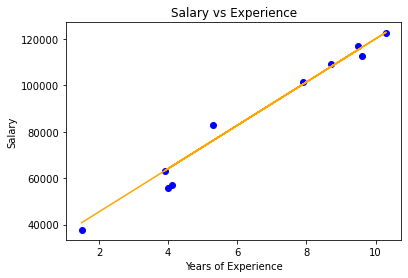

In [12]:
def main():
    # Importing dataset     
    df = pd.read_csv( "salary_data.csv" ) 
    X = df.iloc[:, :-1].values 
    Y = df.iloc[:, 1].values     
  
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y,  
                                            
                                          test_size = 1 / 3, random_state = 0 ) 
      
    # Model training     
    model = RidgeRegression( iterations = 1000,                              
                            learning_rate = 0.01, l2_penalty = 1 ) 
    model.fit( X_train, Y_train ) 
      
    # Prediction on test set 
    Y_pred = model.predict( X_test )     
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )      
    print( "Real values      ", Y_test[:3] )     
    print( "Trained W        ", round( model.W[0], 2 ) )     
    print( "Trained b        ", round( model.b, 2 ) ) 
      
    # Visualization on test set      
    plt.scatter( X_test, Y_test, color = 'blue', label='Actual Data' )     
    plt.plot( X_test, Y_pred, color = 'orange', label='Regression Line' )     
    plt.title( 'Salary vs Experience' )     
    plt.xlabel( 'Years of Experience' )     
    plt.ylabel( 'Salary' )     
    plt.show() 
      
if __name__ == "__main__" :  
    main() 